# [CDAF] Atividade 3

## Nome e matrícula
Nome: Diogo Tuler Chaves
Matrícula: 2022043663

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Imports


In [163]:
import json
import pandas as pd
import socceraction.spadl
import matplotsoccer
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
import scipy

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [164]:

with open ('/home/diogo/Documents/Notebook_3/events_World_Cup.json') as f:
    data = json.load(f)
i = 0

#2058011,"Brazil - Belgium, 1 - 2"
match_id = 2058011

while match_id != data[i]['matchId']:
    i += 1
    
j = i
while match_id == data[j]['matchId']:
    j += 1

match_events = pd.DataFrame(data[i:j])
match_events = match_events.rename(
    columns={
        'id': 'event_id',
        'eventId': 'type_id',
        'playerId': 'player_id',
        'matchPeriod': 'period_id',
        'eventSec': 'milliseconds',
        'subEventId': 'subtype_id',
        'eventName': 'event_name',
        'matchId': 'game_id',
    }
)

match_events['milliseconds'] *= 1000
match_events['team_id'] = match_events['teamId']

actions = socceraction.spadl.wyscout.convert_to_actions(match_events, 0).dropna()
events_name_dict = match_events[['type_id', 'event_name']].set_index('type_id').to_dict()['event_name']
events_id_dict = dict(map(reversed, match_events['event_id'].to_dict().items()))

actions['type_name'] = actions['original_event_id'].apply(lambda x: events_name_dict[match_events.loc[events_id_dict[x]]['type_id']])

team_mapping = {
    6380: 'Brazil',
    5629: 'Belgium',
}
actions["team_name"] = actions['team_id'].map(team_mapping)
actions.reset_index(inplace=True)

df = pd.read_csv('players.csv', header=None)
df.columns = df.iloc[0]

df = df[1:].reset_index(drop=True)
df = df[["firstName",'wyId']].rename(columns={'firstName': 'player_name','wyId': 'player_id'})
df['player_id'] = df['player_id'].astype(int)

actions = actions.merge(df, on='player_id', how='left')


In [165]:
actions

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name
0,0,2058011,1H,3.138710,6380,340386,52.50,33.32,70.35,32.64,262118649,0,0,1,0,Pass,Brazil,Gabriel Fernando
1,1,2058011,1H,4.448640,6380,105339,70.35,32.64,66.15,21.08,262118650,0,0,1,1,Pass,Brazil,Fernando Luiz
2,2,2058011,1H,6.007661,6380,3802,66.15,21.08,72.45,31.96,262118651,0,0,1,2,Pass,Brazil,Philippe
3,3,2058011,1H,7.212177,6380,105339,72.45,31.96,71.40,14.28,262118652,0,0,1,3,Pass,Brazil,Fernando Luiz
4,4,2058011,1H,10.071047,6380,3310,71.40,14.28,75.60,21.08,262118653,0,0,1,4,Pass,Brazil,Marcelo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1251,2058011,2H,2964.640045,5629,25707,24.15,48.28,7.35,65.28,262120570,0,0,1,1251,Pass,Belgium,Eden
1159,1252,2058011,2H,2969.222600,5629,38021,7.35,65.28,7.35,65.28,262120571,5,1,0,1252,Pass,Belgium,Kevin
1160,1253,2058011,2H,2970.415478,6380,3431,99.75,7.48,105.00,8.84,262120558,0,10,1,1253,Others on the ball,Brazil,Jo\u00e3o
1161,1254,2058011,2H,2985.617382,5629,38021,0.00,68.00,2.10,61.20,262120572,0,6,1,1254,Free Kick,Belgium,Kevin


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [166]:
actions[(actions['result_id'] == 1) & (actions['type_name'] == 'Shot') & (actions['team_name'] == 'Brazil')]

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name
978,1056,2058011,2H,1819.535837,6380,14785,10.5,38.08,0.0,37.4,262120230,3,11,1,1056,Shot,Brazil,Renato


In [167]:
gol_brazil_idx = actions[(actions['result_id'] == 1) & (actions['type_name'] == 'Shot') & (actions['team_name'] == 'Brazil')].index[0]
start_idx = gol_brazil_idx-4
end_idx = gol_brazil_idx+1
gol_brazil = actions.iloc[start_idx:end_idx]
gol_brazil

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name
974,1051,2058011,2H,1806.889624,5629,8307,95.55,28.56,36.75,34.00,262120225,0,18,1,1051,Others on the ball,Belgium,Vincent
975,1052,2058011,2H,1810.949588,6380,40810,36.75,34.00,39.90,33.32,262120223,1,0,1,1052,Pass,Brazil,Neymar
976,1053,2058011,2H,1811.770480,6380,105339,39.90,33.32,32.55,20.40,262120224,0,0,1,1053,Pass,Brazil,Fernando Luiz
977,1055,2058011,2H,1818.093210,6380,3802,22.05,26.52,10.50,38.08,262120228,0,0,1,1055,Pass,Brazil,Philippe
978,1056,2058011,2H,1819.535837,6380,14785,10.50,38.08,0.00,37.40,262120230,3,11,1,1056,Shot,Brazil,Renato


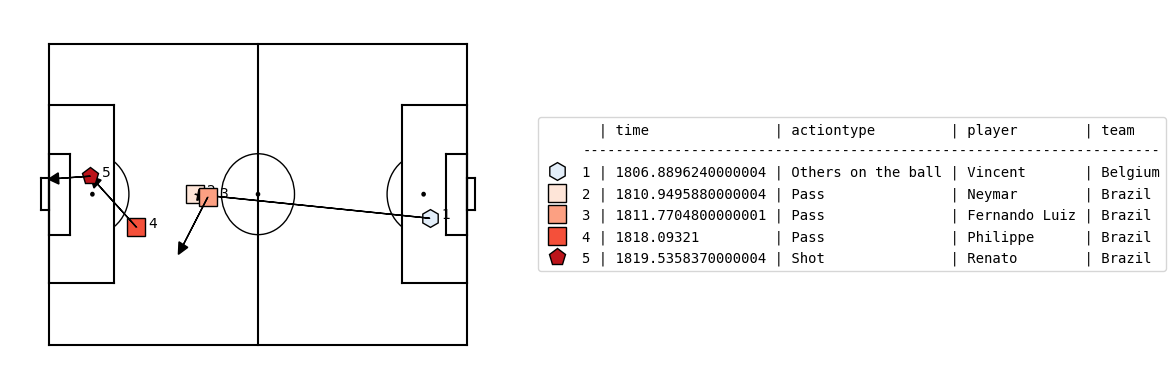

In [168]:

matplotsoccer.actions(
    location=gol_brazil[["start_x", "start_y", "end_x", "end_y"]],
    action_type=gol_brazil.type_name,
    team=gol_brazil.team_name,
    result= gol_brazil.result_id == 1,
    label=gol_brazil[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

## Questão 3
- Visualize as finalizações da partida a partir do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time teve as melhores chances da partida? Por quê?

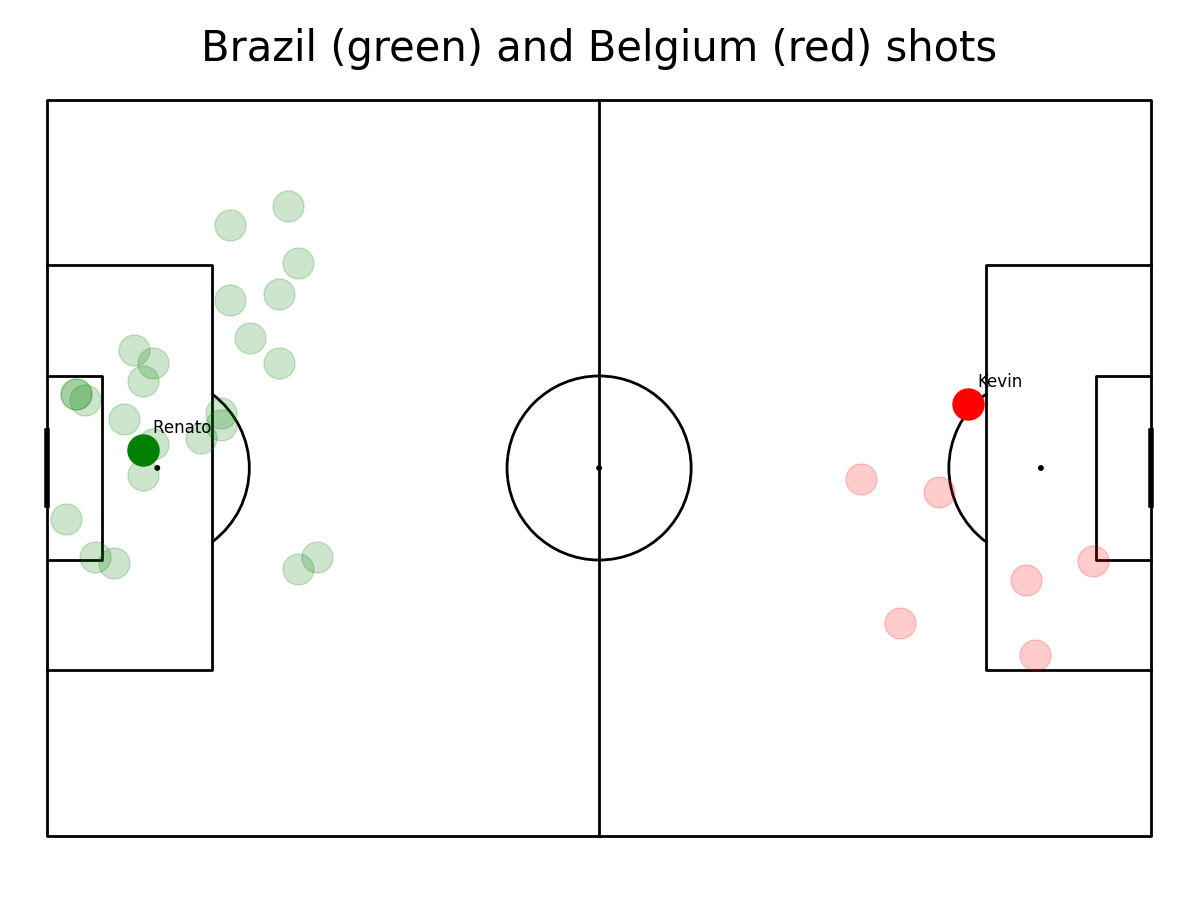

In [169]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_Brazil = (actions.type_name == 'Shot') & (actions.team_name == "Brazil")
#finding rows in the df and keeping only necessary columns
df_Brazil = actions.loc[mask_Brazil, ['start_x', 'start_y', 'result_id', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for Brazil
for i, row in df_Brazil.iterrows():
    if row["result_id"] == 1:
    #make circle
       pitch.scatter(row.start_x, row.start_y, alpha = 1, s = 500, color = "green", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.start_x + 1, row.start_y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.start_x, row.start_y, alpha = 0.2, s = 500, color = "green", ax=ax['pitch'])

mask_Belgium = (actions.type_name == 'Shot') & (actions.team_name == "Belgium")
df_Belgium = actions.loc[mask_Belgium, ['start_x', 'start_y', 'result_id', "player_name"]]

#for Belgium we need to revert coordinates
for i, row in df_Belgium.iterrows():
    if row["result_id"] == 1:
       pitch.scatter(120 - row.start_x, 80 - row.start_y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.start_x + 1, 80 - row.start_y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.start_x, 80 - row.start_y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

fig.suptitle("Brazil (green) and Belgium (red) shots", fontsize = 30)
plt.show()

Obviamente o Brasil teve a maior quantidade de chances, pois temos mais pontos verdes que vermelhos. Além disso, as chances do Brasil foram bem mais perto do gol, logo podemos afirmar que suas chances foram melhores.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? A localização de suas ações varia muito do ataque para a defesa?

O jogador escolhido é o com id 38021, que é o Kevin De Bruyne

In [170]:
actions['type_name'].unique()

array(['Pass', 'Free Kick', 'Others on the ball', 'Shot', 'Foul', 'Duel',
       'Save attempt'], dtype=object)

In [171]:
ofensivas = ['Pass', 'Free Kick', 'Shot']
defensivas = ['Foul', 'Duel', 'Save attempt']

##### Total de ações

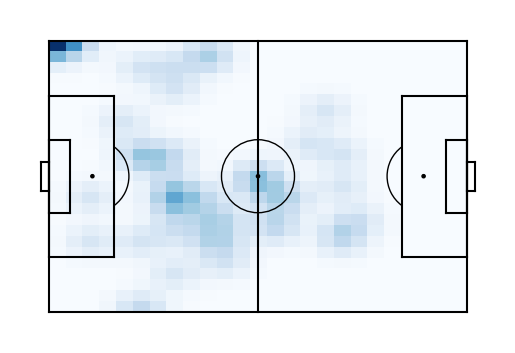

<Axes: >

In [172]:
kevin_actions = actions[(actions['player_id'] == 38021)]

hm = matplotsoccer.count(kevin_actions['start_x'],kevin_actions['start_y'],n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) 
matplotsoccer.heatmap(hm) 

##### Ofensivas

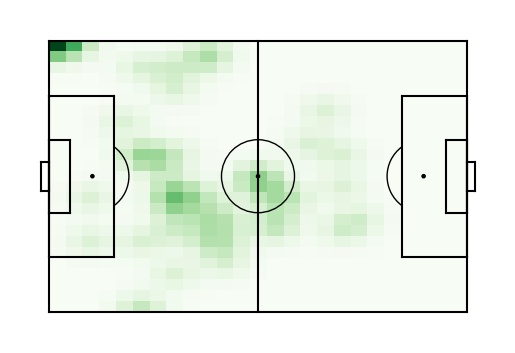

<Axes: >

In [173]:
filtered_actions = kevin_actions[kevin_actions['type_name'].isin(ofensivas)]

hm = matplotsoccer.count(filtered_actions['start_x'],filtered_actions['start_y'],n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) 
matplotsoccer.heatmap(hm,cmap="Greens") 

##### Defensivas

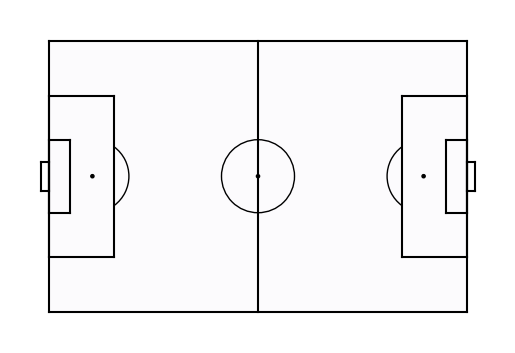

<Axes: >

In [174]:
filtered_actions = kevin_actions[kevin_actions['type_name'].isin(defensivas)]

hm = matplotsoccer.count(filtered_actions['start_x'],filtered_actions['start_y'],n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) 
matplotsoccer.heatmap(hm,cmap="Purples") 

##### Resposta

É um jogador totalmente ofensivo tendo em vista que não possui ações defensivas no dataset.Não é possível avaliar a diferença de localização para suas ações, pois suas ações defensivas não aparecem no dataset.


## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

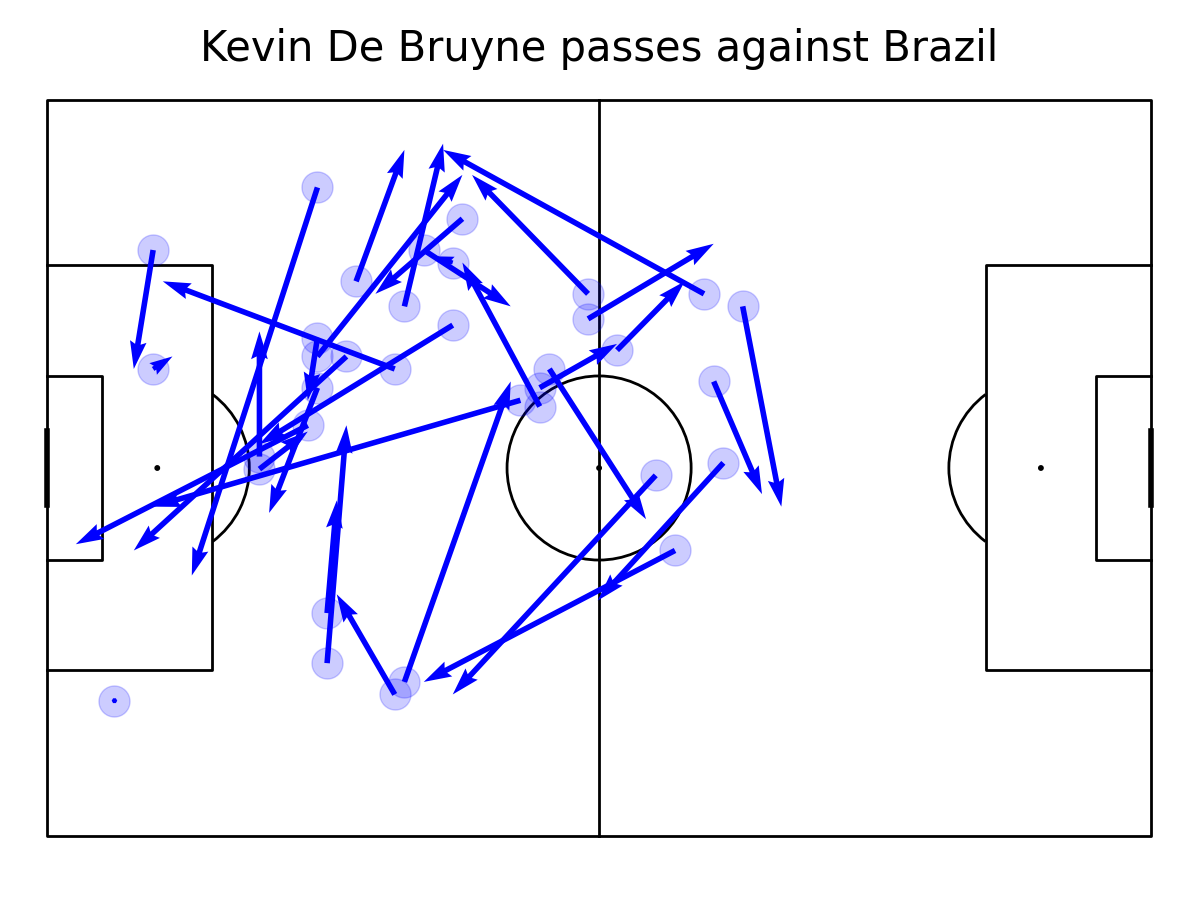

In [175]:
mask_bronze = (actions.type_name == 'Pass') & (actions.player_id == 38021)
df_pass = actions.loc[mask_bronze, ['start_x', 'start_y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.start_x, df_pass.start_y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.start_x, df_pass.start_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Kevin De Bruyne passes against Brazil", fontsize = 30)
plt.show()

Já sabíamos pelo exercício anterior que o jogador é bastante ofensivo. No entanto, este mapa de passes revelou uma informação nova sobre sua excepcional capacidade na criação de jogadas ofensivas. Ele distribuiu uma quantidade significativa de passes que levaram a bola a posições de alto risco de gol, muitas vezes dentro da área adversária.

## Questão 6
- Crie uma rede de passes de cada uma das equipes. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

In [215]:
passes = actions[(actions['type_name'] == "Pass") & (actions['result_id'] == 1)]

passes['pass_recipient_name'] = None 

for indice,linha in passes.iterrows():

    event_id = linha["original_event_id"]
    index = actions[(actions['original_event_id'] == event_id)].index[0]
    if actions.iloc[index+1]['team_name'] == actions.iloc[index]['team_name']:
        passes.loc[index, 'pass_recipient_name'] = actions.iloc[index+1]["player_name"]
        
passes['pass_recipient_name'].astype(str)
passes["player_name"] = passes["player_name"].apply(lambda x: str(x).split()[-1])
passes["pass_recipient_name"] = passes["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

indices_none = passes[passes['pass_recipient_name'] == "None"].index
passes.drop(indices_none, inplace=True)

passes

/tmp/ipykernel_45246/2253559640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['pass_recipient_name'] = None
/tmp/ipykernel_45246/2253559640.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes["player_name"] = passes["player_name"].apply(lambda x: str(x).split()[-1])
/tmp/ipykernel_45246/2253559640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name,pass_recipient_name
0,0,2058011,1H,3.138710,6380,340386,52.50,33.32,70.35,32.64,262118649,0,0,1,0,Pass,Brazil,Fernando,Luiz
1,1,2058011,1H,4.448640,6380,105339,70.35,32.64,66.15,21.08,262118650,0,0,1,1,Pass,Brazil,Luiz,Philippe
2,2,2058011,1H,6.007661,6380,3802,66.15,21.08,72.45,31.96,262118651,0,0,1,2,Pass,Brazil,Philippe,Luiz
3,3,2058011,1H,7.212177,6380,105339,72.45,31.96,71.40,14.28,262118652,0,0,1,3,Pass,Brazil,Luiz,Marcelo
4,4,2058011,1H,10.071047,6380,3310,71.40,14.28,75.60,21.08,262118653,0,0,1,4,Pass,Brazil,Marcelo,Jo\u00e3o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1238,2058011,2H,2873.383452,6380,3310,42.00,6.80,35.70,26.52,262120527,0,0,1,1238,Pass,Brazil,Marcelo,Luiz
1147,1239,2058011,2H,2874.697351,6380,105339,35.70,26.52,36.75,8.16,262120529,0,0,1,1239,Pass,Brazil,Luiz,Marcelo
1149,1242,2058011,2H,2882.754148,6380,40810,28.35,34.00,21.00,56.44,262175175,0,0,1,1242,Pass,Brazil,Neymar,Douglas
1151,1244,2058011,2H,2892.709150,6380,105334,18.90,44.88,18.90,34.00,262120538,0,0,1,1244,Pass,Brazil,Douglas,Neymar


##### Passes Brasil

In [216]:
passes_brazil = passes[(passes['team_name'] == "Brazil")]
passes_brazil

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name,pass_recipient_name
0,0,2058011,1H,3.138710,6380,340386,52.50,33.32,70.35,32.64,262118649,0,0,1,0,Pass,Brazil,Fernando,Luiz
1,1,2058011,1H,4.448640,6380,105339,70.35,32.64,66.15,21.08,262118650,0,0,1,1,Pass,Brazil,Luiz,Philippe
2,2,2058011,1H,6.007661,6380,3802,66.15,21.08,72.45,31.96,262118651,0,0,1,2,Pass,Brazil,Philippe,Luiz
3,3,2058011,1H,7.212177,6380,105339,72.45,31.96,71.40,14.28,262118652,0,0,1,3,Pass,Brazil,Luiz,Marcelo
4,4,2058011,1H,10.071047,6380,3310,71.40,14.28,75.60,21.08,262118653,0,0,1,4,Pass,Brazil,Marcelo,Jo\u00e3o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1237,2058011,2H,2868.650119,6380,20394,58.80,43.52,42.00,6.80,262120526,0,0,1,1237,Pass,Brazil,Emiliano,Marcelo
1146,1238,2058011,2H,2873.383452,6380,3310,42.00,6.80,35.70,26.52,262120527,0,0,1,1238,Pass,Brazil,Marcelo,Luiz
1147,1239,2058011,2H,2874.697351,6380,105339,35.70,26.52,36.75,8.16,262120529,0,0,1,1239,Pass,Brazil,Luiz,Marcelo
1149,1242,2058011,2H,2882.754148,6380,40810,28.35,34.00,21.00,56.44,262175175,0,0,1,1242,Pass,Brazil,Neymar,Douglas


In [217]:
scatter_df = pd.DataFrame()
for i, id in enumerate(passes_brazil["player_name"].unique()):
    passx = passes_brazil.loc[passes_brazil["player_name"] == id]["start_x"].to_numpy()
    recx = passes_brazil.loc[passes_brazil["player_name"] == id]["end_x"].to_numpy()
    passy = passes_brazil.loc[passes_brazil["player_name"] == id]["start_y"].to_numpy()
    recy = passes_brazil.loc[passes_brazil["pass_recipient_name"] == id]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = id
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "start_x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "start_y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = passes_brazil.loc[passes_brazil["player_name"] == id].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

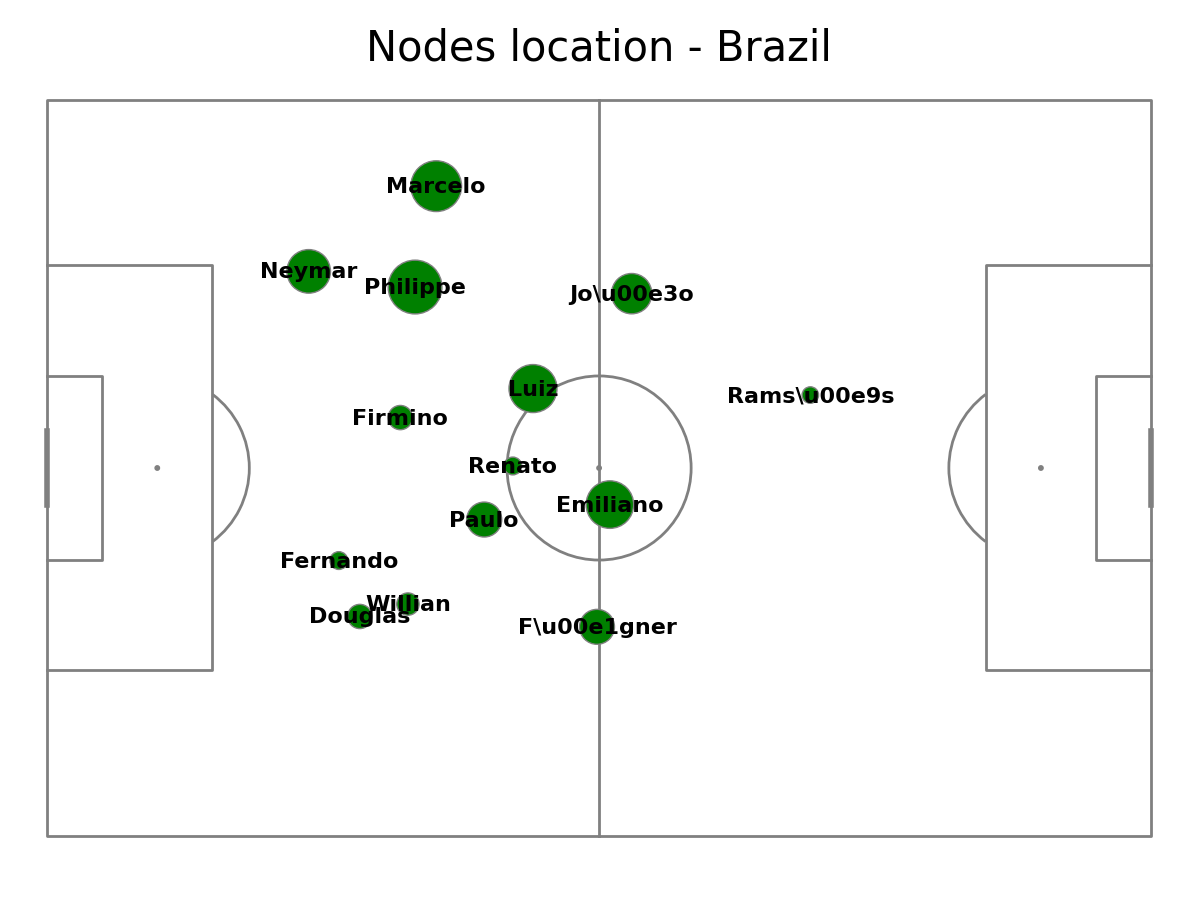

In [218]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.start_x, scatter_df.start_y, s=scatter_df.marker_size, color='green', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.start_x, row.start_y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Brazil", fontsize = 30)
plt.show()

In [219]:
#counting passes between players
passes_brazil[["player_name","pass_recipient_name"]] = passes_brazil[["player_name","pass_recipient_name"]].astype(str)
passes_brazil["pair_key"] = passes_brazil.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = passes_brazil.groupby(["pair_key"]).start_x.count().reset_index()
lines_df.rename({'start_x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

/tmp/ipykernel_45246/3512572056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_brazil[["player_name","pass_recipient_name"]] = passes_brazil[["player_name","pass_recipient_name"]].astype(str)
/tmp/ipykernel_45246/3512572056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_brazil["pair_key"] = passes_brazil.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)


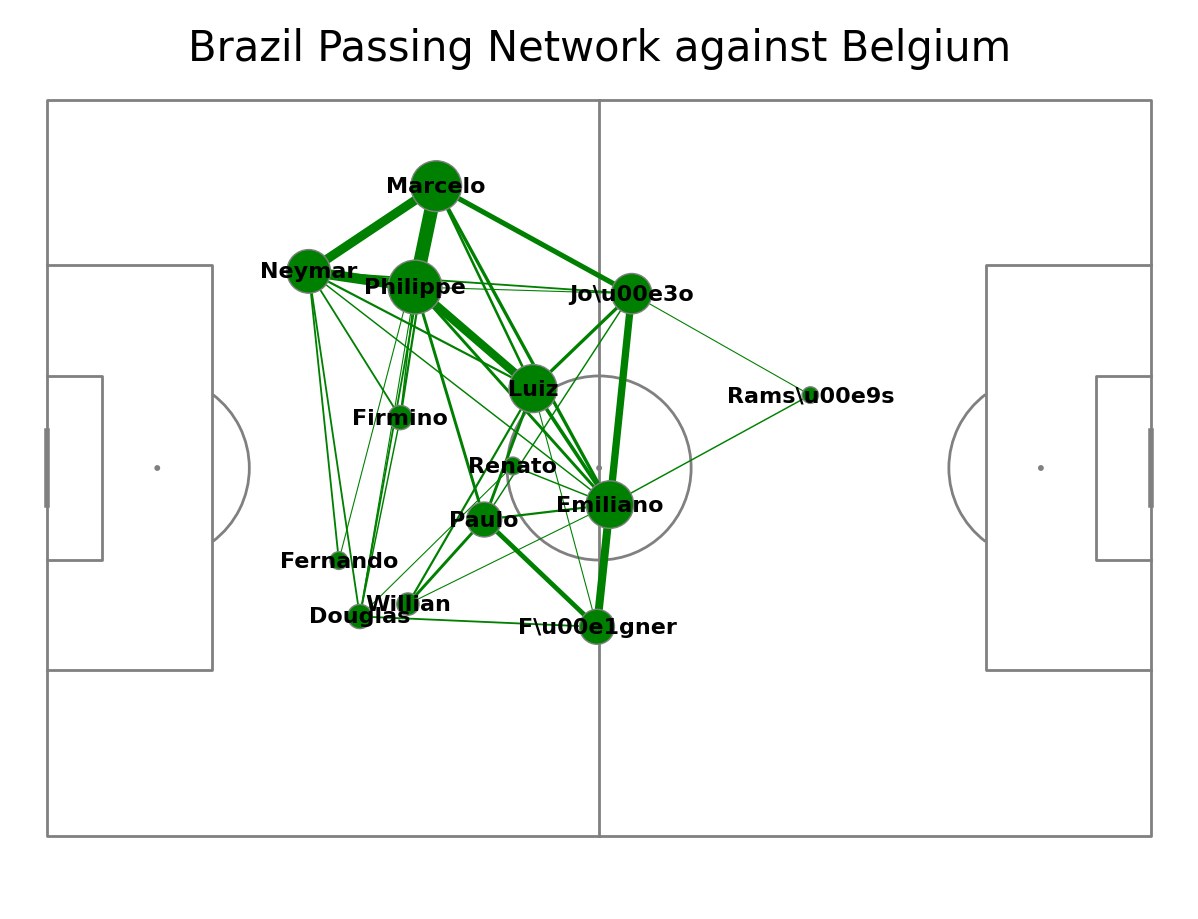

In [223]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.start_x, scatter_df.start_y, s=scatter_df.marker_size, color='green', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.start_x, row.start_y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['start_x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['start_y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['start_x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['start_y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="green", ax = ax["pitch"])

fig.suptitle("Brazil Passing Network against Belgium", fontsize = 30)
plt.show()

##### Passes Bélgica

In [226]:
passes_belgium = passes[(passes['team_name'] == "Belgium")]
passes_belgium

,index,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,team_name,player_name,pass_recipient_name
13,13,2058011,1H,50.565051,5629,8307,73.50,25.16,75.60,51.68,262118666,0,0,1,13,Pass,Belgium,Vincent,Toby
14,14,2058011,1H,53.156866,5629,36,75.60,51.68,76.65,34.00,262118667,0,0,1,14,Pass,Belgium,Toby,Vincent
15,15,2058011,1H,55.143530,5629,8307,76.65,34.00,75.60,45.56,262118668,0,0,1,15,Pass,Belgium,Vincent,Toby
23,23,2058011,1H,86.963177,5629,48,44.10,12.92,44.10,12.92,262118681,0,10,1,23,Pass,Belgium,Jan,Jan
30,30,2058011,1H,134.694036,5629,8307,81.90,18.36,77.70,52.36,262118697,0,0,1,30,Pass,Belgium,Vincent,Toby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1209,2058011,2H,2770.344540,5629,70123,31.50,51.00,45.15,45.56,262120530,0,0,1,1209,Pass,Belgium,Axel,Youri
1120,1210,2058011,2H,2772.244886,5629,263802,45.15,45.56,36.75,34.00,262120532,0,0,1,1210,Pass,Belgium,Youri,Axel
1121,1211,2058011,2H,2773.858105,5629,70123,36.75,34.00,32.55,42.84,262120533,0,0,1,1211,Pass,Belgium,Axel,Marouane
1136,1227,2058011,2H,2807.284693,5629,37824,92.40,44.20,92.40,44.20,262120544,0,10,1,1227,Pass,Belgium,Thomas,Thomas


In [227]:
scatter_df = pd.DataFrame()
for i, id in enumerate(passes_belgium["player_name"].unique()):
    passx = passes_belgium.loc[passes_belgium["player_name"] == id]["start_x"].to_numpy()
    recx = passes_belgium.loc[passes_belgium["player_name"] == id]["end_x"].to_numpy()
    passy = passes_belgium.loc[passes_belgium["player_name"] == id]["start_y"].to_numpy()
    recy = passes_belgium.loc[passes_belgium["pass_recipient_name"] == id]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = id
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "start_x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "start_y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = passes_belgium.loc[passes_belgium["player_name"] == id].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

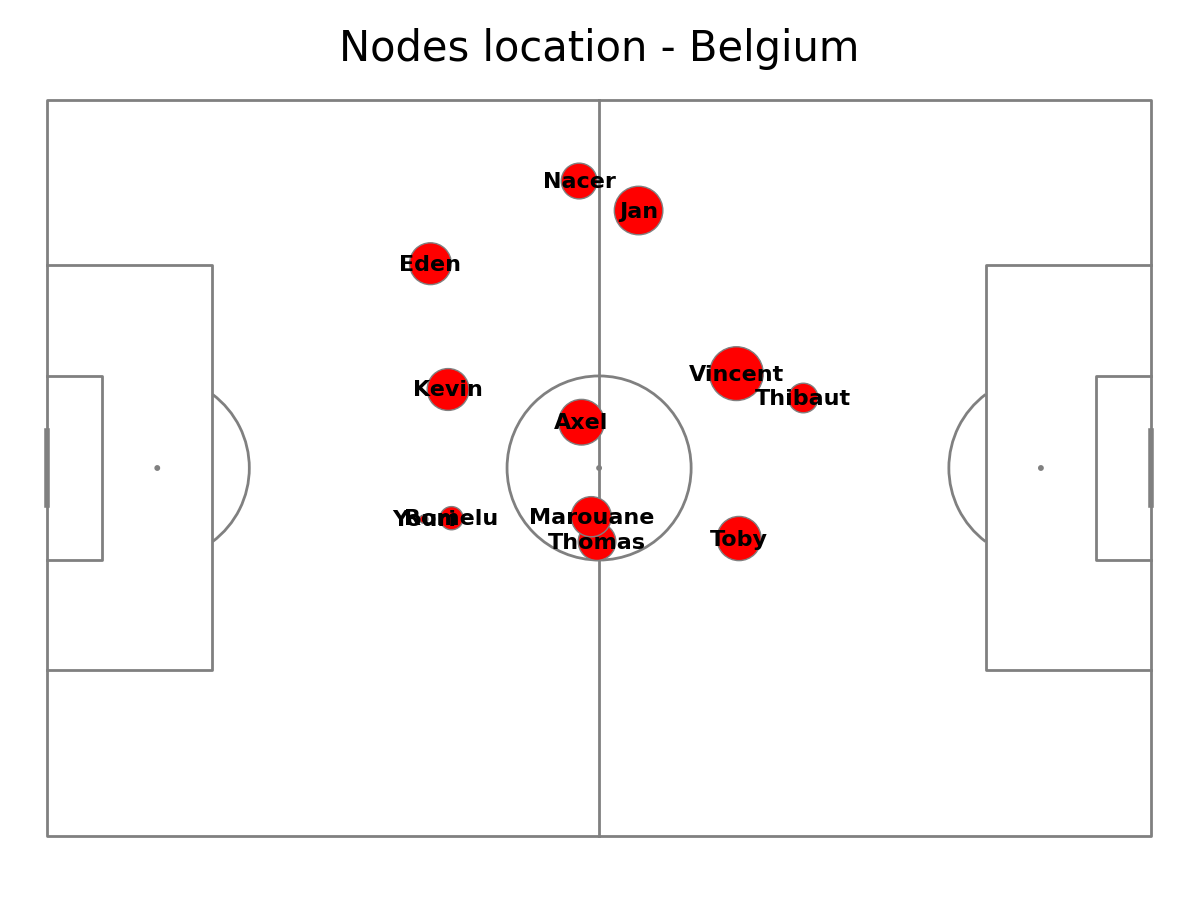

In [228]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.start_x, scatter_df.start_y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.start_x, row.start_y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Belgium", fontsize = 30)
plt.show()

In [230]:
#counting passes between players
passes_belgium[["player_name","pass_recipient_name"]] = passes_belgium[["player_name","pass_recipient_name"]].astype(str)
passes_belgium["pair_key"] = passes_belgium.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = passes_belgium.groupby(["pair_key"]).start_x.count().reset_index()
lines_df.rename({'start_x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

/tmp/ipykernel_45246/157776405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_belgium[["player_name","pass_recipient_name"]] = passes_belgium[["player_name","pass_recipient_name"]].astype(str)
/tmp/ipykernel_45246/157776405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_belgium["pair_key"] = passes_belgium.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)


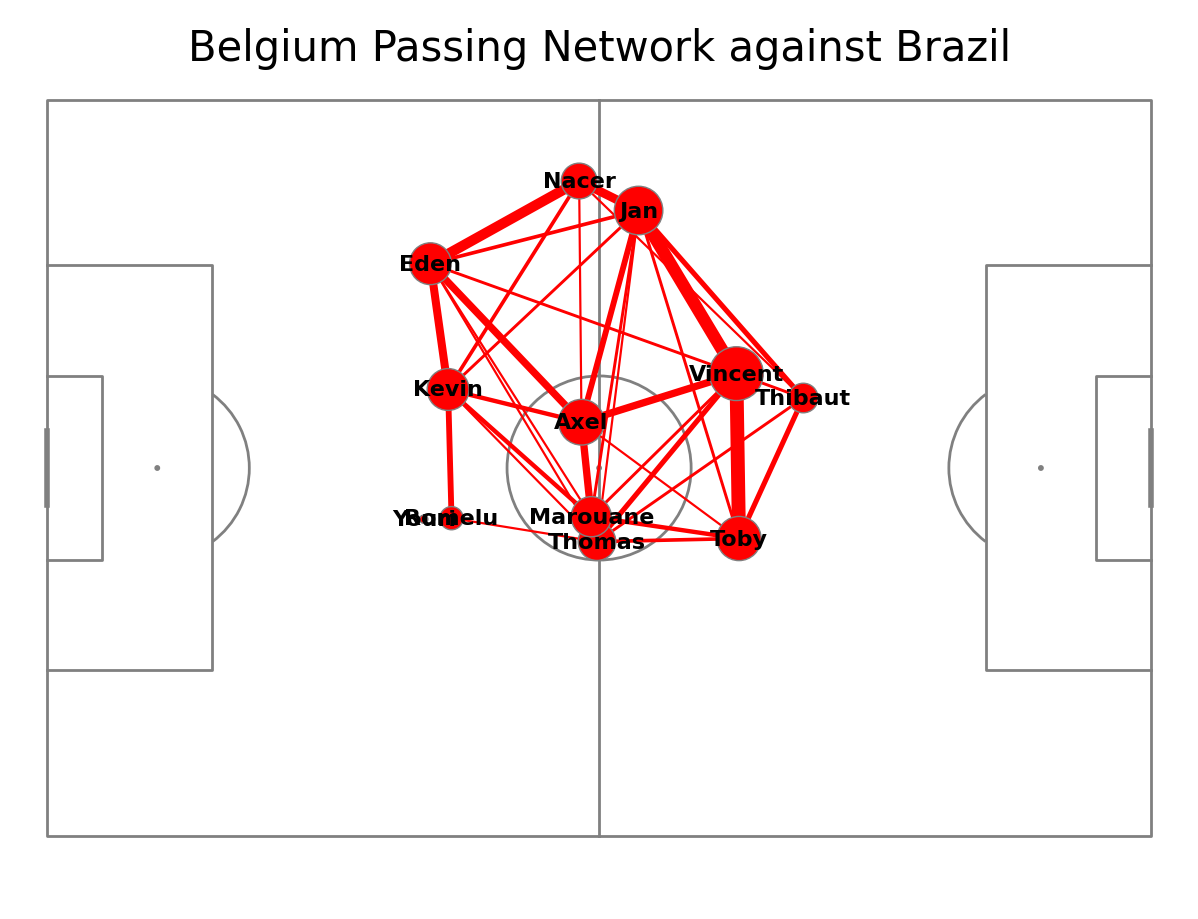

In [231]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.start_x, scatter_df.start_y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.start_x, row.start_y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['start_x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['start_y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['start_x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['start_y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Belgium Passing Network against Brazil", fontsize = 30)
plt.show()

##### Resposta

A formação do Brasil é mais espaçada, enquanto a da Bélgica é mais centralizada, com uma troca de passes mais intensiva, porém com um alcance menor e mais seguro. Isso provavelmente está relacionado ao estilo de jogo mais ofensivo e driblador do Brasil, que resulta em menos trocas de passes. Marcelo, lateral esquerdo da seleção brasileira e do Real Madrid na época, foi o jogador com mais passes no Brasil, desempenhando um papel crucial na construção das jogadas e na transição da defesa para o ataque. Já na Bélgica, em consonância com seu estilo mais defensivo e focado em passes seguros, o zagueiro Vincent Kompany, então no Manchester City, foi o jogador com mais passes, oferecendo uma opção confiável enquanto a equipe belga buscava formas de infiltrar na defesa brasileira.